In [39]:
!pip install mglearn

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


import mglearn

## Supervised Learning
### Classification and Regression


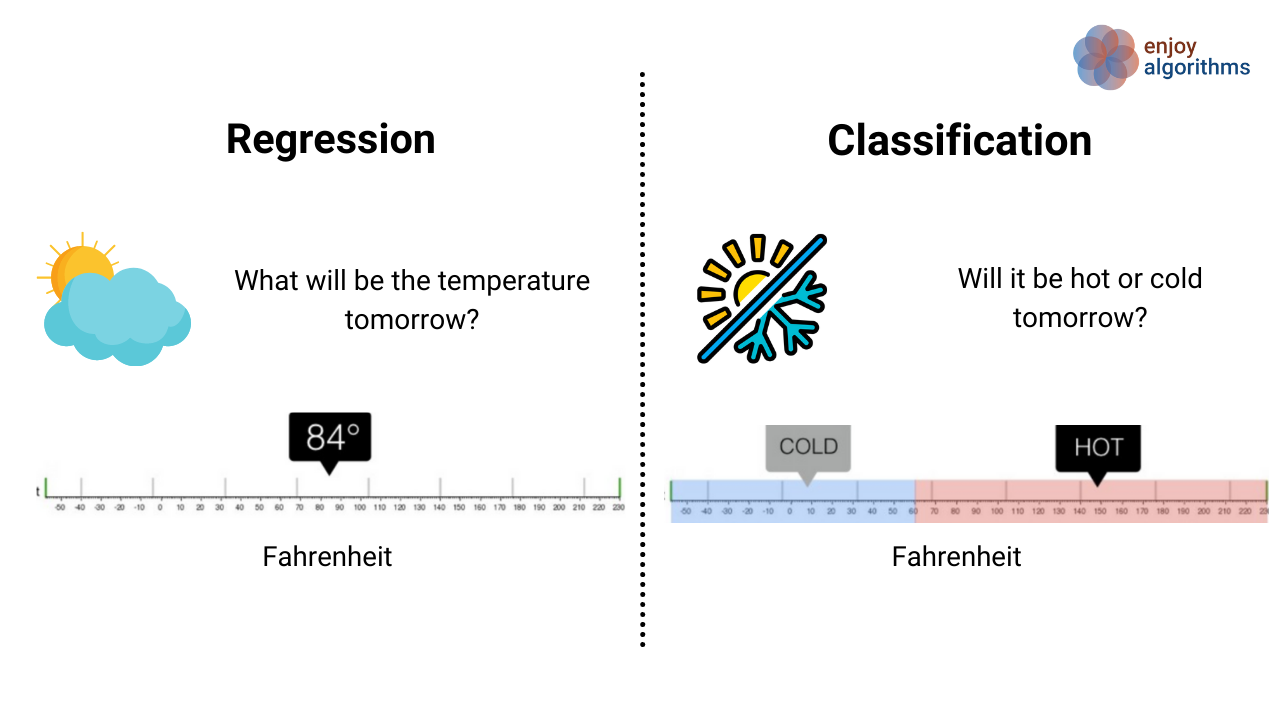

#### Relation of Model Complexity to Dataset Size


It's important to note that model complexity is intimately tied to the variation of inputs contained in your training dataset: the larger variety of data points your dataset contains, the more complex a model you can use without overfitting. Usually, collecting more data points will yield more variety, so larger datasets allow building
more complex models. However, simply duplicating the same data points or collecting very similar data will not help.

Going back to the boat selling example, if we saw 10,000 more rows of customer data, and all of them complied with the rule "If the customer is older than 45, and has less than 3 children or is not divorced, then they want to buy a boat," we would be much more likely to believe this to be a good rule than when it was developed using only the 12 samples.

Having more data and building appropriately more complex models can often work wonders for supervised learning tasks. In the real world, you often have the ability to decide how much data to collect, which might be more beneficial than tweaking and tuning your model. Never underestimate the power of more data.

### Supervised Machine Learning Algorithms
#### Some Sample Datasets

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [42]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [43]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [44]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


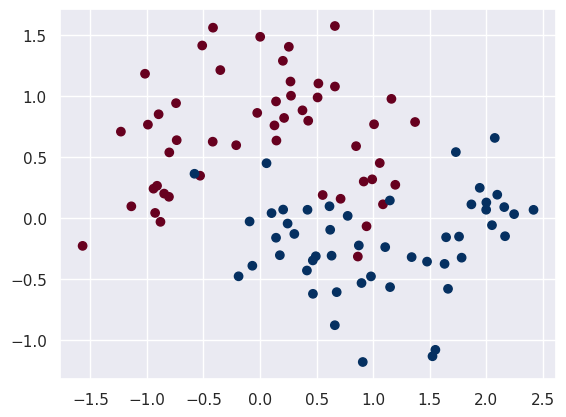

In [45]:
from sklearn.datasets import make_moons

moons = make_moons(noise=0.3)

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=moons[1],cmap='RdBu')
plt.show()

#### k-Nearest Neighbors
##### k-Neighbors classification

In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point.

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent: in other words, the majority class among the k-nearest neighbors.

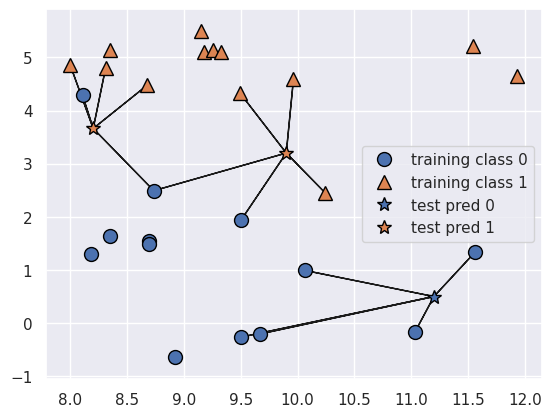

In [46]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [47]:
from sklearn.model_selection import train_test_split
X, y = moons[0], moons[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
#Following your intuition build a knn classifier.

# Create a KNN classifier with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Use the fitted classifier to predict the labels for X_test
y_pred = knn.predict(X_test)



print("Your y_pred shape is {}. It must be {}.".format(y_pred.shape,y_test.shape))

print('Test set accuracy for your custom model: {:.2f}'.format(np.mean(y_pred==y_test)))

Your y_pred shape is (25,). It must be (25,).
Test set accuracy for your custom model: 0.92


In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions:", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0]
Test set accuracy: 0.92


##### Analyzing KNeighborsClassifier

For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane. We color the plane according to the class that would be assigned to a point in this region. This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

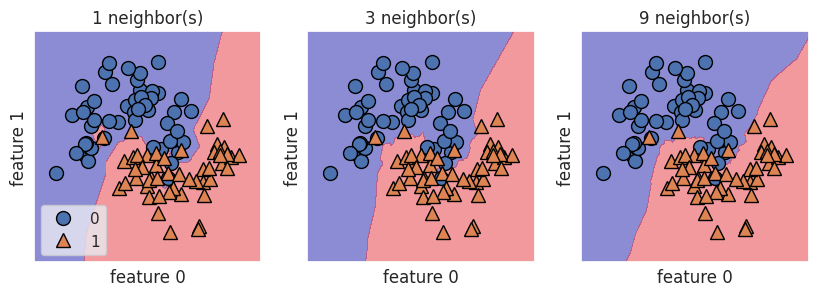

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # Train a KNeighborsClassifier using n_neighbors as the number of nearest
    # neighbors, and X_train,y_train as the training set.
    # Your model's name must be clf.

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Let's investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier. We will do this on the real-world Breast Cancer dataset. We begin by splitting the dataset into a training and a test set. Then we evaluate training and test set performance with different numbers of neighbors.

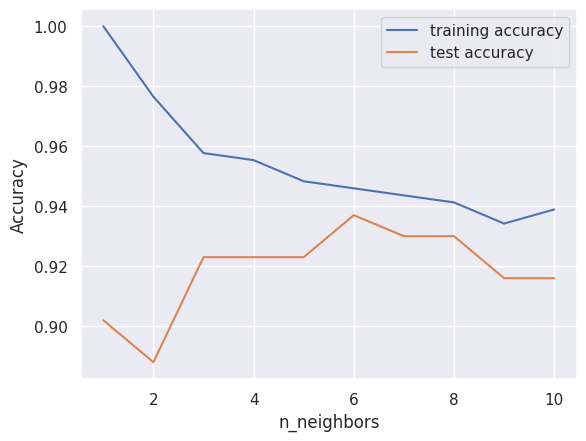

In [51]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Build and train the model using n_neighbors, X_train, and y_train:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # Record training set accuracy by appending the score to the training_accuracy list
    training_accuracy.append(clf.score(X_train, y_train))

    # Record generalization accuracy by appending the score to the test_accuracy list
    test_accuracy.append(clf.score(X_test, y_test))

# Plot the training and test accuracies
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

##### Cross-validation: evaluating estimator performance

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques:

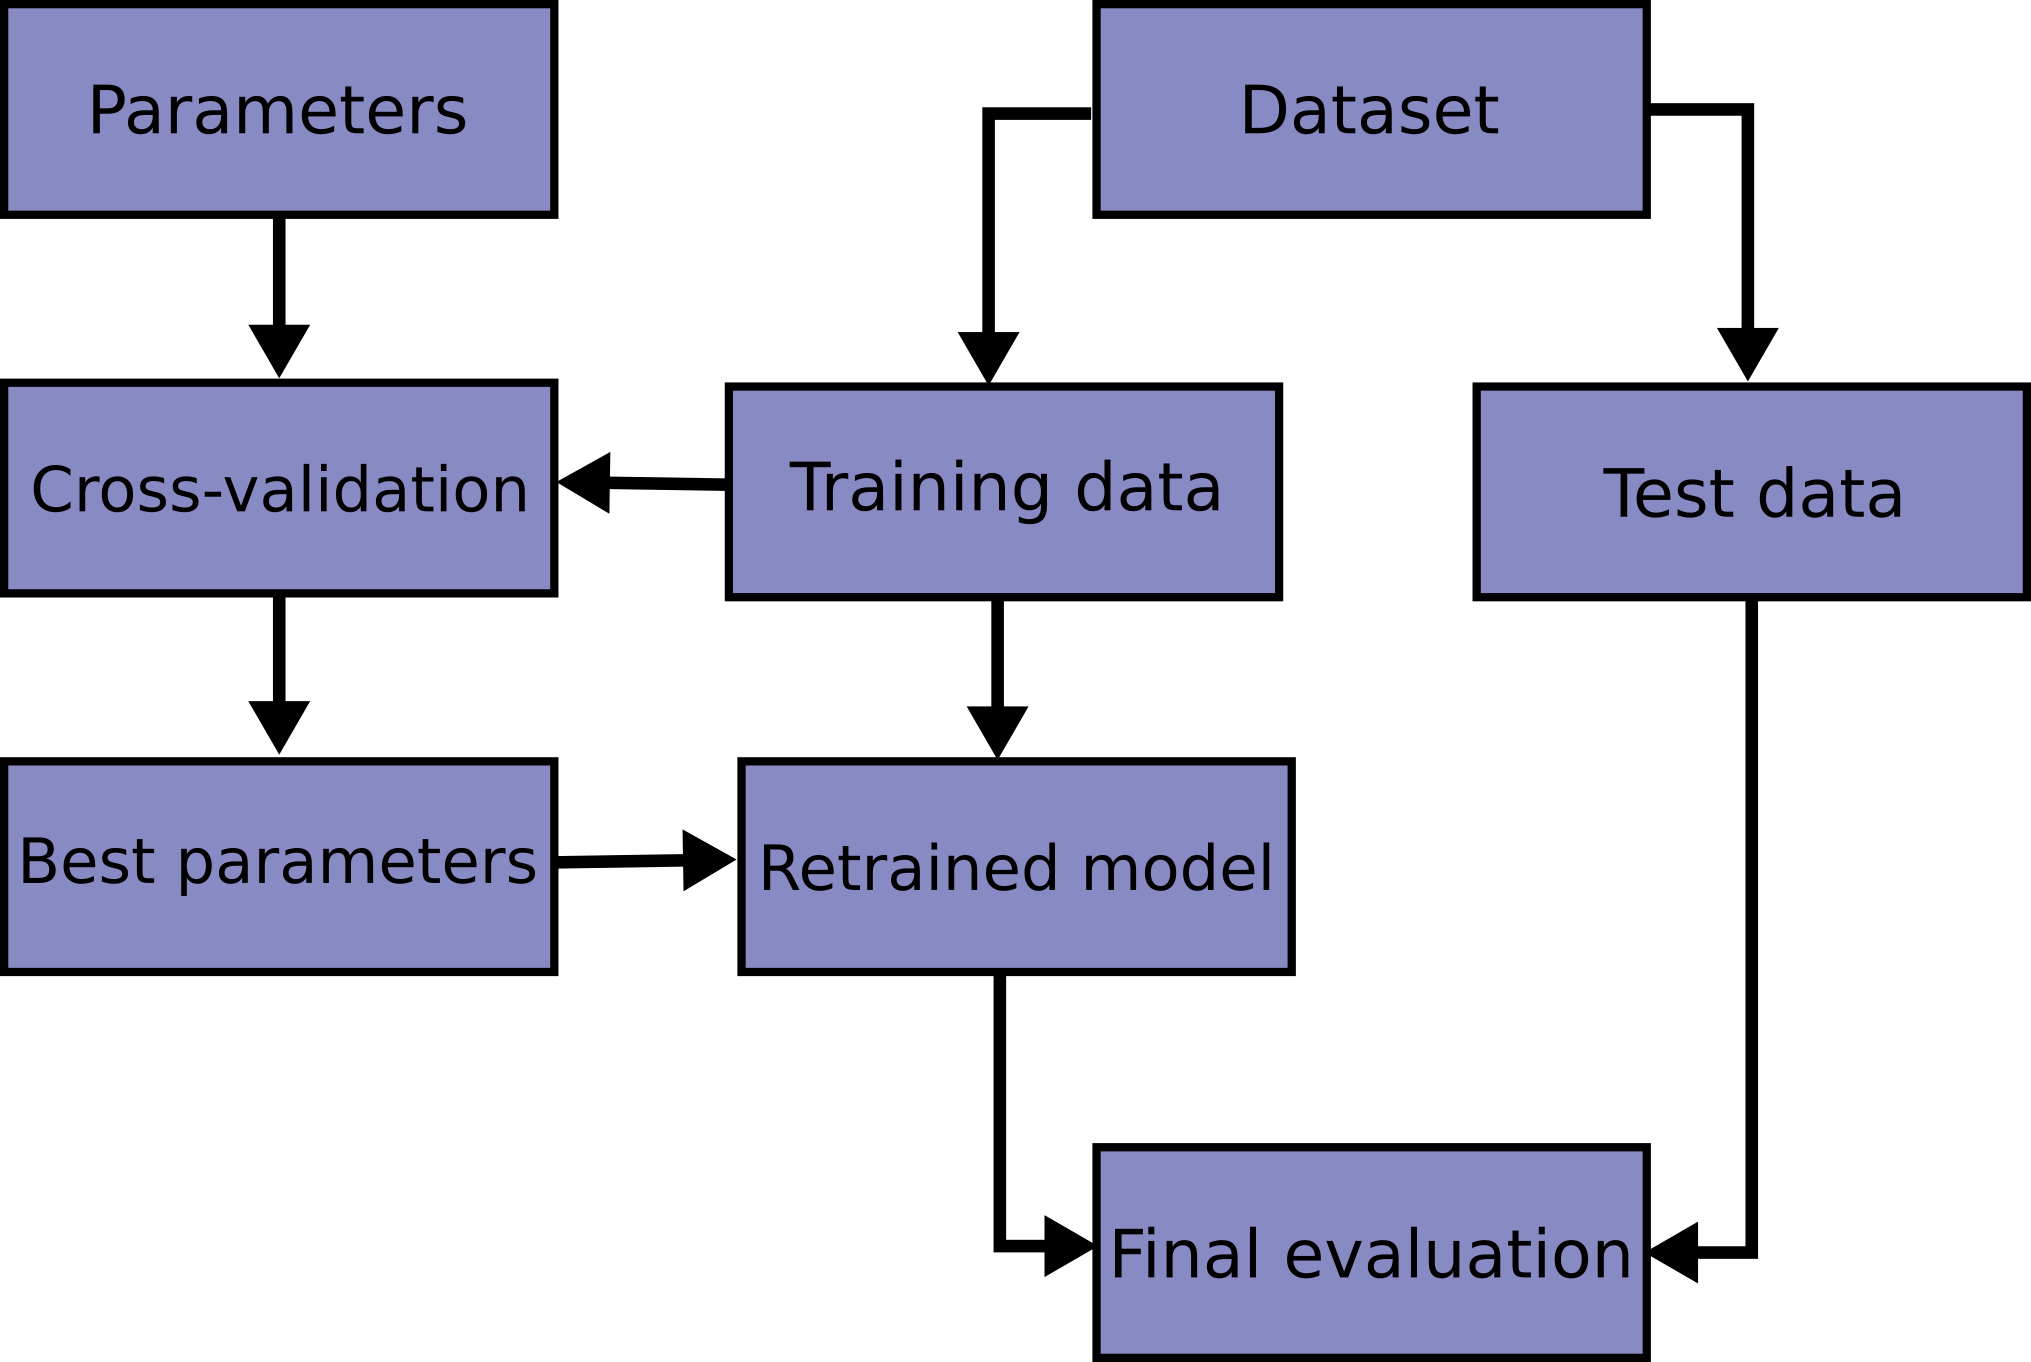

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:


*   A model is trained using $k-1$ of the folds as training data;
*   the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

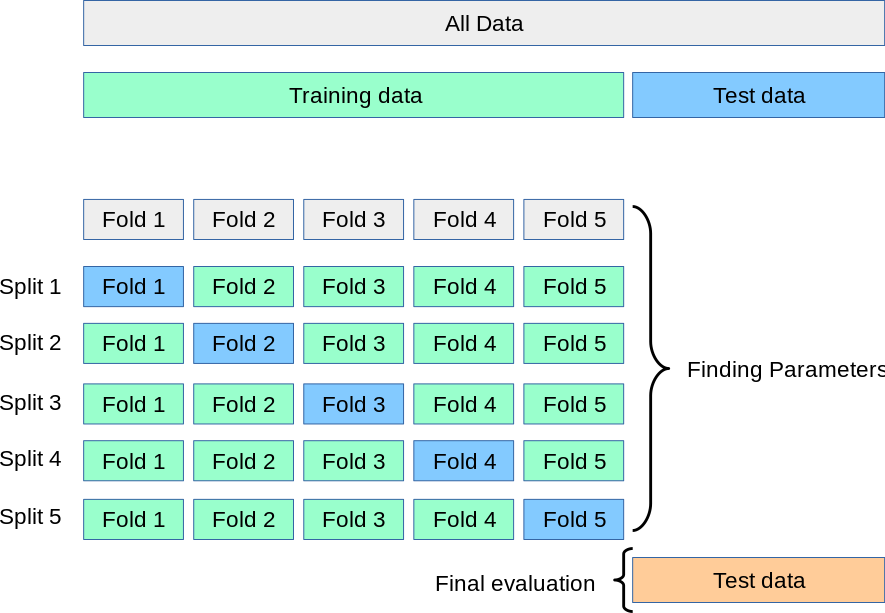

The simplest way to use cross-validation is to call the `cross_val_score` helper function on the estimator and the dataset:

In [52]:
#Explore the influence of some number of nearest neighbors on the score
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.94186047 0.94117647 0.94117647 0.91764706 0.92941176]
0.93 accuracy with a standard deviation of 0.01


##### Tuning the hyper-parameters of an estimator

Hyper-parameters are parameters that are not directly learnt within estimators. In `scikit-learn` they are passed as arguments to the constructor of the estimator classes. A typical example is the `n_neighbors` in the `KNeighborsClassifier`.

It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

```
estimator.get_params()

```





In [53]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

A search consists of:

*   an estimator (regressor or classifier such as `sklearn.neighbors.KNeighborsClassifier()`);
*   a parameter space;
*   a method for searching or sampling candidates;
*   a cross-validation scheme; and
*   a score function.

Two generic approaches to parameter search are provided in `scikit-learn`: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.

The grid search provided by `GridSearchCV` exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter. For instance, the following `param_grid`:

```
param_grid = {'n_neighbors': [1, 3, 9, 15], 'metric': ['euclidean','minkowski']}
 ```



In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 9, 15], 'metric': ['euclidean','minkowski']}

clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=5)

clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.942 total time=   0.2s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.941 total time=   0.2s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.941 total time=   0.0s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.918 total time=   0.0s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.929 total time=   0.0s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.942 total time=   0.2s
[CV 2/5] END ...metric=euclidean, n_neighbors=3;, score=0.906 total time=   0.2s
[CV 3/5] END ...metric=euclidean, n_neighbors=3;, score=0.941 total time=   0.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=3;, score=0.918 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=3;, score=0.906 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=9;, score=0.930 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=9;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [1, 3, 9, 15]},
             verbose=5)

In [55]:
#Explore the content of the object clf_gs
# Best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV: ", clf_gs.best_params_)

# Best score found by GridSearchCV
print("Best score found by GridSearchCV: ", clf_gs.best_score_)

# Best estimator (model) found by GridSearchCV
print("Best estimator found by GridSearchCV: ", clf_gs.best_estimator_)

# Cross-validation results for each combination of parameters
cv_results = clf_gs.cv_results_
print("Cross-validation results: ", cv_results)

# Evaluate the performance of the best estimator on the test set
best_model = clf_gs.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score on test set: ", test_score)


Best parameters found by GridSearchCV:  {'metric': 'euclidean', 'n_neighbors': 15}
Best score found by GridSearchCV:  0.934281805745554
Best estimator found by GridSearchCV:  KNeighborsClassifier(metric='euclidean', n_neighbors=15)
Cross-validation results:  {'mean_fit_time': array([0.00483689, 0.0029357 , 0.00327563, 0.00343423, 0.00332494,
       0.00674186, 0.00125823, 0.00212202]), 'std_fit_time': array([0.00642633, 0.00330148, 0.00412222, 0.00235259, 0.00197553,
       0.00397163, 0.00037883, 0.00234706]), 'mean_score_time': array([0.0888124 , 0.13515935, 0.06453457, 0.07089243, 0.07365246,
       0.06564903, 0.05734906, 0.01544833]), 'std_score_time': array([0.0805999 , 0.06320602, 0.04577975, 0.01947819, 0.03819459,
       0.06027645, 0.04401468, 0.00265421]), 'param_metric': masked_array(data=['euclidean', 'euclidean', 'euclidean', 'euclidean',
                   'minkowski', 'minkowski', 'minkowski', 'minkowski'],
             mask=[False, False, False, False, False, False, Fa

In [56]:
import pandas as pd

cv_results = pd.DataFrame(clf_gs.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004837,0.006426,0.088812,0.080600,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.941860,0.941176,0.941176,0.917647,0.929412,0.934254,0.009518,3
1,0.002936,0.003301,0.135159,0.063206,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.941860,0.905882,0.941176,0.917647,0.905882,0.922490,0.016121,7
2,0.003276,0.004122,0.064535,0.045780,euclidean,9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.930233,0.905882,0.964706,0.929412,0.917647,0.929576,0.019689,5
3,0.003434,0.002353,0.070892,0.019478,euclidean,15,"{'metric': 'euclidean', 'n_neighbors': 15}",0.930233,0.905882,0.964706,0.929412,0.941176,0.934282,0.019078,1
4,0.003325,0.001976,0.073652,0.038195,minkowski,1,"{'metric': 'minkowski', 'n_neighbors': 1}",0.941860,0.941176,0.941176,0.917647,0.929412,0.934254,0.009518,3
5,0.006742,0.003972,0.065649,0.060276,minkowski,3,"{'metric': 'minkowski', 'n_neighbors': 3}",0.941860,0.905882,0.941176,0.917647,0.905882,0.922490,0.016121,7
6,0.001258,0.000379,0.057349,0.044015,minkowski,9,"{'metric': 'minkowski', 'n_neighbors': 9}",0.930233,0.905882,0.964706,0.929412,0.917647,0.929576,0.019689,5
7,0.002122,0.002347,0.015448,0.002654,minkowski,15,"{'metric': 'minkowski', 'n_neighbors': 15}",0.930233,0.905882,0.964706,0.929412,0.941176,0.934282,0.019078,1


Now, we can use the best model for our task:

In [57]:
print('The best parameters are {} for a cv mean performance of {:2.2f}'.format(clf_gs.best_params_,clf_gs.best_score_*100))

#Get the best trained estimator from the GridSearchCV object clf_gs
best_clf =clf_gs.best_estimator_

print('The performance in the test set is {:.2f}'.format(100*best_clf.score(X_test,y_test)))

The best parameters are {'metric': 'euclidean', 'n_neighbors': 15} for a cv mean performance of 93.43
The performance in the test set is 92.31


##### k-neighbors regression

There is also a regression variant of the k-nearest neighbors algorithm. Again, we can use more than the single closest neighbor for regression. When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors

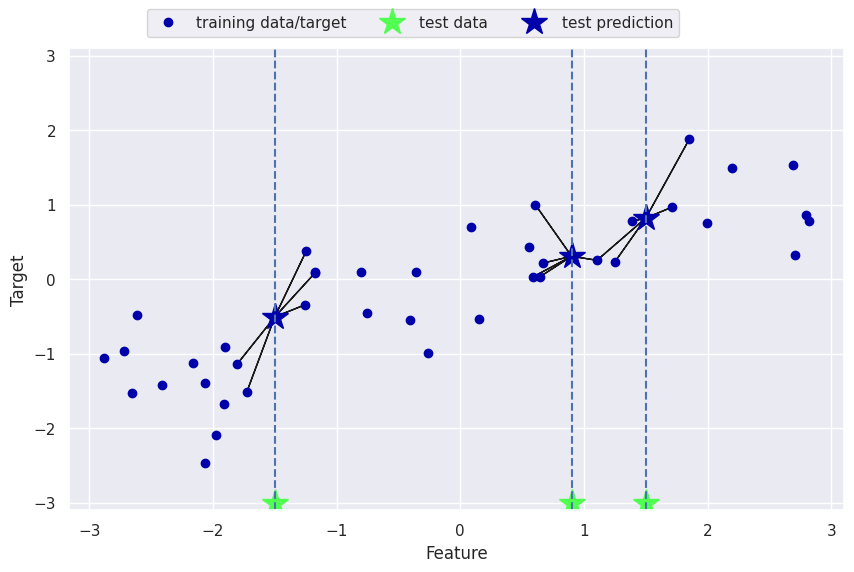

In [58]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [59]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the wave dataset into a training and a test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [60]:
#Print the test predictions:

By default, the `score` method for regression models is the R2 score.

In [61]:
#Print the test score:

y_pred = reg.predict(X_test)
print("Test predictions:", y_pred)

Test predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


##### Analyzing KNeighborsRegressor

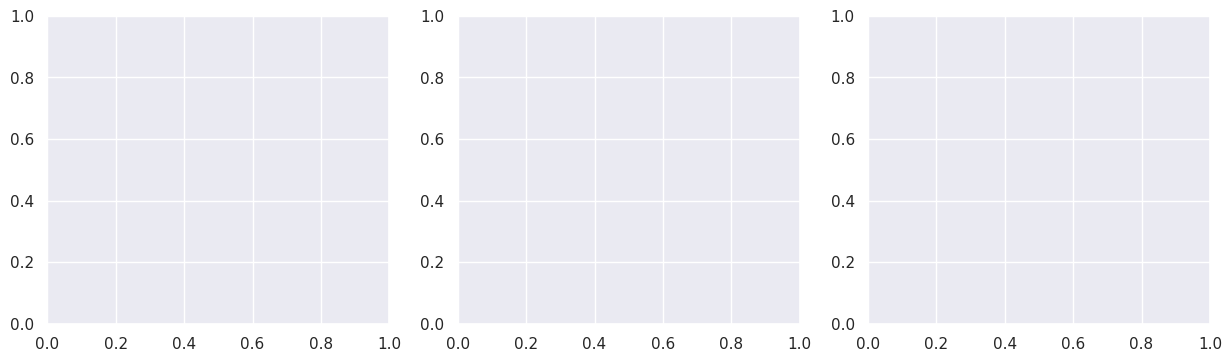

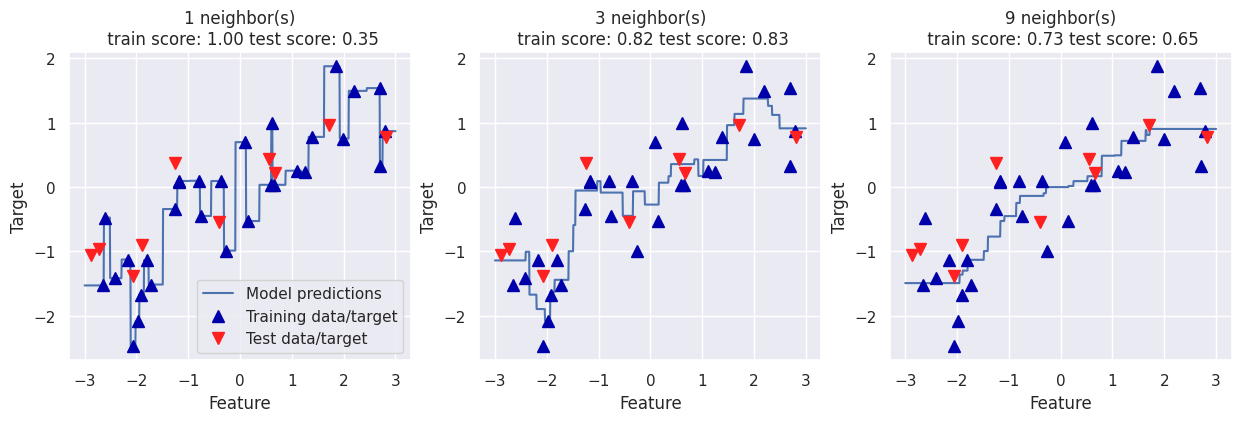

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):

    # Train a KNeighborsRegressor using n_neighbors as the number of nearest
    # neighbors, and X_train,y_train as the training set.
    # Your model's name must be reg.

   X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # Retrain a KNeighborsRegressor using n_neighbors as the number of nearest
    # neighbors, and X_train, y_train as the training set.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)

    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

##### Strengths, weaknesses, and parameters

In principle, there are two important parameters to the KNeighbors classifier:

1.   **The number of neighbors**. In practice, using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter.
2.   **How you measure distance between data points**. Choosing the right distance measure is somewhat tricky. By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow.

When using the k-NN algorithm, it's important to preprocess your data. This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

So, while the nearest k-neighbors algorithm is easy to understand, it is hardly used in practice, due to prediction being slow and its inability to handle many features.

### Homework

For the iris dataset:

1.   Create a train and test subsets.
2.   Train a kNN classifier and tune its hyperparameters in a gridsearch cross-validation strategy
3.   Print the score on the test set for the best found model.


In [69]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the classifier, parameter grid, and cross-validation settings
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=2, n_jobs=-1)

# entreno del modelo
grid_search.fit(X_train, y_train)

# imprimir los mejores parametros
print("Best parameters found by GridSearchCV: ", grid_search.best_params_)

# imprimir los puntajes
print("Score on test set for the best found model: ", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found by GridSearchCV:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Score on test set for the best found model:  0.9640316205533598
